<a href="https://colab.research.google.com/github/isabella-horne/Stock-predictor/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the libraries
from sklearn.linear_model import LinearRegression
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
#Get stock data set
data = pdr.get_data_stooq("AAPL", start="2012-01-01", end="2023-02-07")
dates = list(range(0,int(len(data))))
prices = data['Close']
#Check for any missing values
prices[np.isnan(prices)] = np.median(prices[~np.isnan(prices)])

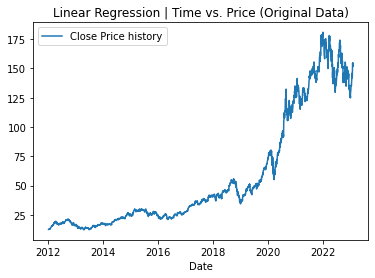

In [ ]:
#Plot Original Data
plt.plot(data['Close'], label='Close Price history')
plt.title('Linear Regression | Time vs. Price (Original Data)')
plt.legend()
plt.xlabel('Date')
plt.show()

In [ ]:
#Convert to numpy array and reshape them
dates = np.asanyarray(dates)
prices = np.asanyarray(prices)
dates = np.reshape(dates,(len(dates),1))
prices = np.reshape(prices, (len(prices), 1))

In [ ]:
#Get the average accuracy of the model
from sklearn.model_selection import train_test_split
mean = 0
for i in range(10):
  #Random Split Data
  msk = np.random.rand(len(data)) < 0.8
  xtest = dates[~msk]
  ytest = prices[~msk]
  mean += reg.score(xtest,ytest)

In [ ]:
print("Average Accuracy:", mean/10)

Average Accuracy: 0.7679629442027693


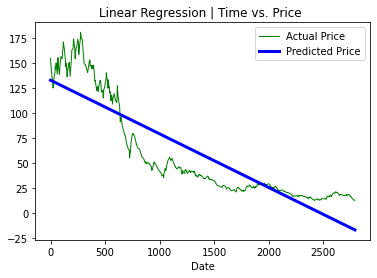

In [ ]:
#Plot Predicted VS Actual Data
plt.plot(xtest, ytest, color='green',linewidth=1, label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, reg.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price ')
plt.legend()
plt.xlabel('Date')
plt.show()